In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

Using TensorFlow backend.


In [2]:
fake_data_path = 'E:\Fake News Classification\Fake.csv'
fake_data_path = fake_data_path.replace('\\', '/')
fake_data = pd.read_csv(fake_data_path)

In [3]:
true_data_path = 'E:\Fake News Classification\True.csv'
true_data_path = true_data_path.replace('\\', '/')
true_data = pd.read_csv(true_data_path)

In [4]:
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
true_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
fake_data["true"] = 0

In [7]:
fake_data.head(5)

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
true_data["true"] = 1

In [9]:
true_data.head(5)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
data = pd.concat([true_data, fake_data])

In [11]:
data = data.sample(frac=1)

In [12]:
data.reset_index(drop=True, inplace=True)

In [13]:
data

,title,text,subject,date,true
0,EU leaders likely to give go-ahead to new phas...,PARIS (Reuters) - The leaders of the European ...,worldnews,"December 13, 2017",1
1,U.S. senator urges DOJ to reject any White Hou...,"WASHINGTON (Reuters) - Senator Amy Klobuchar, ...",politicsNews,"July 7, 2017",1
2,Seth Meyers: GOP ‘Sh*t All Over’ President Ob...,President Obama has been working for months to...,News,"January 19, 2016",0
3,Donald Trump Goes On INSANE Coke-Fueled Rant ...,In what may mark the absolute low point of thi...,News,"October 15, 2016",0
4,Pope faces diplomatic dilemma in Myanmar visit,VATICAN CITY (Reuters) - Pope Francis visits M...,worldnews,"November 23, 2017",1
...,...,...,...,...,...
44893,Egyptian forces destroy arms smugglers' vehicl...,CAIRO (Reuters) - Egyptian military jets destr...,worldnews,"November 11, 2017",1
44894,Trump to keep Obama rule curbing corporate tax...,(This October 4 story fixes comment by Organi...,politicsNews,"October 4, 2017",1
44895,U.S. diplomats accuse Tillerson of breaking ch...,WASHINGTON (Reuters) - A group of about a doze...,politicsNews,"November 21, 2017",1
44896,U.S. Transportation nominee Chao hits no roadb...,WASHINGTON (Reuters) - Donald Trump’s choice t...,politicsNews,"January 11, 2017",1


Text(0.5, 1.0, 'subject distibution')

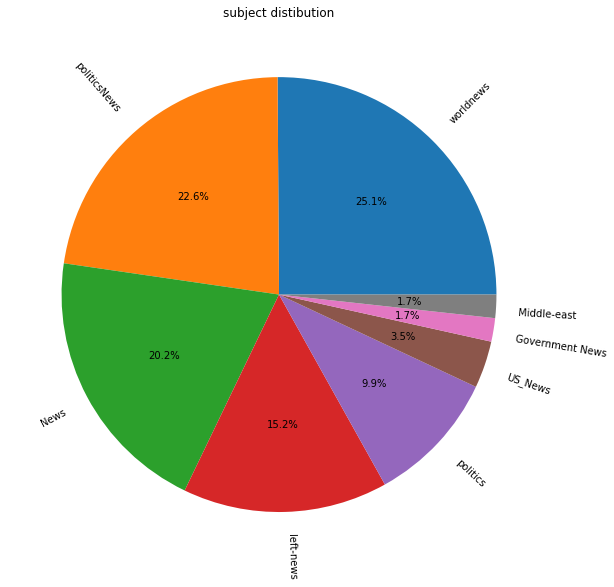

In [14]:
target_counts = data['subject'].value_counts()
target_labels = data['subject'].unique()

fig = plt.figure(figsize=(10,10))

ax = plt.subplot2grid((1,1),(0,0))
plt.pie(target_counts, labels=target_labels, rotatelabels=True, autopct='%1.1f%%')
plt.title('subject distibution')

In [15]:
data = pd.get_dummies(data, columns=["subject"])
data.head()

,title,text,date,true,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
0,EU leaders likely to give go-ahead to new phas...,PARIS (Reuters) - The leaders of the European ...,"December 13, 2017",1,0,0,0,0,0,0,0,1
1,U.S. senator urges DOJ to reject any White Hou...,"WASHINGTON (Reuters) - Senator Amy Klobuchar, ...","July 7, 2017",1,0,0,0,0,0,0,1,0
2,Seth Meyers: GOP ‘Sh*t All Over’ President Ob...,President Obama has been working for months to...,"January 19, 2016",0,0,0,1,0,0,0,0,0
3,Donald Trump Goes On INSANE Coke-Fueled Rant ...,In what may mark the absolute low point of thi...,"October 15, 2016",0,0,0,1,0,0,0,0,0
4,Pope faces diplomatic dilemma in Myanmar visit,VATICAN CITY (Reuters) - Pope Francis visits M...,"November 23, 2017",1,0,0,0,0,0,0,0,1


In [16]:
def preprocess(data):
    pattern = "[^a-zA-Z]"
    lemmatizer = WordNetLemmatizer()
    new = []
    for txt in data:
        txt = txt.lower()
        txt = re.sub(pattern, " ", txt)
        txt = word_tokenize(txt)
        txt = [lemmatizer.lemmatize(word) for word in txt]
        txt = " ".join(txt)
        new.append(txt)
    return new

In [17]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
text_new = preprocess(data.text)
text_new[0]

'paris reuters the leader of the european union s remaining member state are very likely to approve this week the deal struck by their chief negotiator with britain and move to a second phase of exit talk a french presidency source said on wednesday eu leader are almost certain to judge on friday that sufficient progress ha been made on the right of citizen the brexit divorce bill and the irish border to allow negotiation to move to the next phase the eu executive recommended last week that leader approve the start of trade talk'

In [19]:
title_new = preprocess(data["title"])
title_new[0]

'eu leader likely to give go ahead to new phase of brexit talk'

In [20]:
text_vectorizer = CountVectorizer(stop_words="english", max_features = 4000)
title_vectorizer = CountVectorizer(stop_words="english", max_features = 1000)

text_vector = text_vectorizer.fit_transform(text_new).toarray()
title_vector = title_vectorizer.fit_transform(title_new).toarray() 


In [21]:
data.drop(["text","title"],inplace=True, axis=1)

In [22]:
data.drop('date', inplace=True, axis=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 9 columns):
true                       44898 non-null int64
subject_Government News    44898 non-null uint8
subject_Middle-east        44898 non-null uint8
subject_News               44898 non-null uint8
subject_US_News            44898 non-null uint8
subject_left-news          44898 non-null uint8
subject_politics           44898 non-null uint8
subject_politicsNews       44898 non-null uint8
subject_worldnews          44898 non-null uint8
dtypes: int64(1), uint8(8)
memory usage: 701.7 KB


In [24]:
y = data['true']

In [25]:
X = np.concatenate((np.array(data.drop("true", axis=1)), title_vector, text_vector), axis=1)

In [26]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [27]:
def get_top_n_words(text, n=None) -> list:
    vec = CountVectorizer(stop_words= "english")
    vec.fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [28]:
list_fake = get_top_n_words(fake_data['text'], 25)
list_true = get_top_n_words(true_data['text'], 25)

In [29]:
fake_words = [x[0] for x in list_fake]
num_of_fake_words = [x[1] for x in list_fake]

true_words = [x[0] for x in list_true]
num_of_true_words = [x[1] for x in list_true]

<BarContainer object of 25 artists>

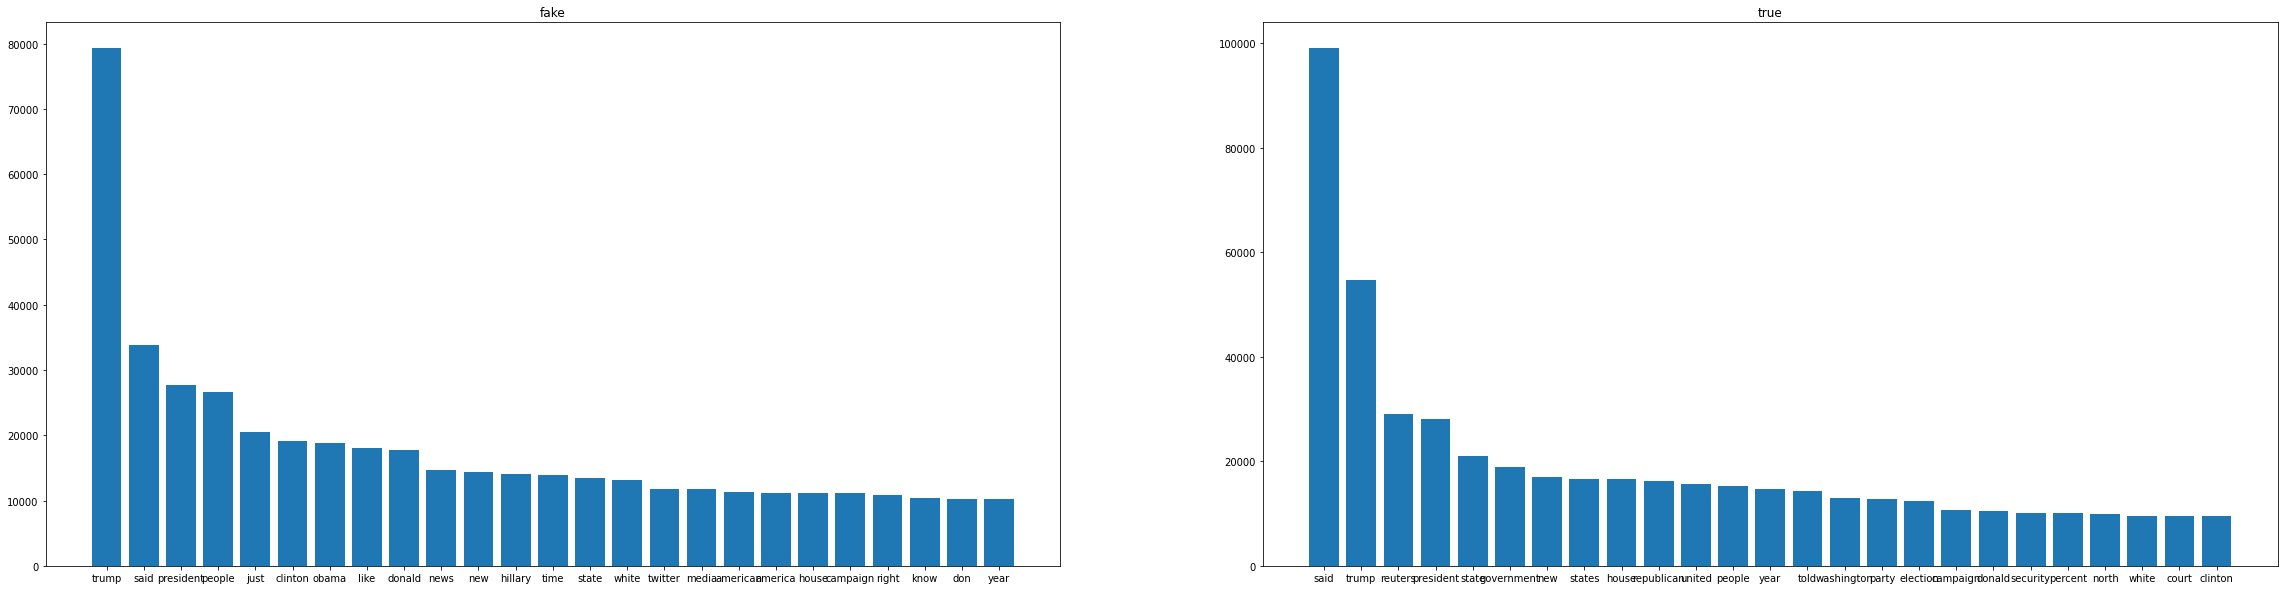

In [30]:
fig = plt.figure(figsize=(40,10))

ax = plt.subplot2grid((1,2),(0,0))
plt.title('fake')
plt.bar(fake_words, num_of_fake_words)


ax = plt.subplot2grid((1,2),(0,1))
plt.title('true')
plt.bar(true_words, num_of_true_words)

In [31]:
target_label = data['true']
data.drop("true", inplace=True, axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, np.array(y), test_size=0.3, shuffle=1)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31428, 5008)
(13470, 5008)
(31428,)
(13470,)


# Building a model

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 99.896


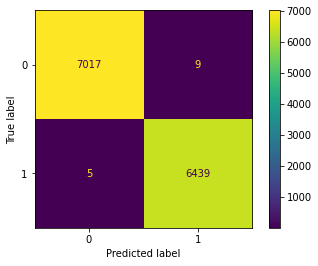

In [34]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

acc_lr = accuracy_score(y_test, pred_lr)
print("accuracy: %0.3f" %(acc_lr*100))

plot_confusion_matrix(model_lr, X_test, y_test)
plt.show()

accuracy: 99.896


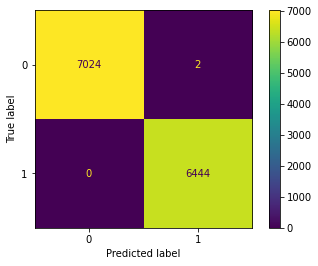

In [35]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

acc_dt = accuracy_score(y_test, pred_dt)
print("accuracy: %0.3f" %(acc_lr*100))

plot_confusion_matrix(model_dt, X_test, y_test)
plt.show()

accuracy: 99.985


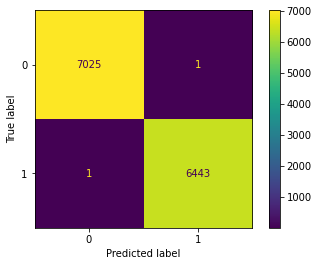

In [38]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

acc_rf = accuracy_score(y_test, pred_rf)
print("accuracy: %0.3f" %(acc_rf*100))

plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

accuracy: 96.763


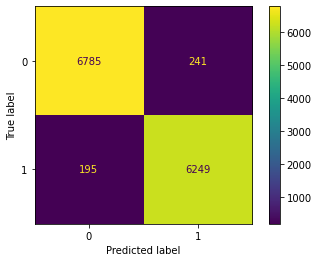

In [41]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)

acc_nb = accuracy_score(y_test, pred_nb)
print("accuracy: %0.3f" %(acc_nb*100))

plot_confusion_matrix(model_nb, X_test, y_test)
plt.show()